In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

k1 = 1.94e-5    
k2 = 1.35e-3       
a1 = 0.507        
a2 = 0.204    
a3 = 1.66
b1 = 0.951
b2 = 0.248
xaum = 70
ccnm = 6000
co2m = 200
Ai = 1e-6     #m2
n =  1e+12    #jumlah   
el = 92     #fraksi liquid     
c_o2 = 400   #assumption

def r_au(c_cn, x_au):
    return k1*((c_cn/ccnm)**a1)*((c_o2/co2m)**2)*(((x_au-xaum)/xaum)**a3)

def r_cn(c_cn, x_au):
    return k2*((c_cn/ccnm)**b1)*((c_o2/co2m)**b2)


def xdot(x,t):
    c_cn, x_au = x
    dAudt = r_au(c_cn, x_au)*Ai*n/el
    dCndt = -r_cn(c_cn, x_au)*Ai*n/el
    return [dAudt, dCndt]

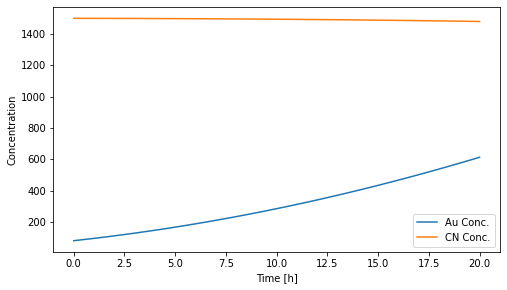

In [ ]:
IC = [80,1500]

t = np.linspace(0,20)      
sol = odeint(xdot,IC,t)
x_au,c_cn = sol.transpose()

plt.figure(figsize=(8,4.5))
plt.plot(t,x_au)
plt.plot(t,c_cn)

plt.xlabel('Time [h]')
plt.ylabel('Concentration')
plt.legend(['Au Conc.',
            'CN Conc.'
            ])